In [2]:
import sys
sys.path.append("..")
import numpy as np
import torch
import matplotlib.pyplot as plt
from seametrics.segmentation.pq import PanopticQuality

/home/franziskadenk/mambaforge/envs/mask2former/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
def show_masks(preds, targets):
    plt.subplots(figsize=(2, 2))
    plt.imshow(preds[:, :, 0])
    for i in range(preds.size(0)):
        for j in range(preds.size(1)):
            plt.text(i, j, preds[i, j, 1].item(), color="red", label="id")
    plt.title("Prediction")
    plt.show()

    plt.subplots(figsize=(2, 2))
    plt.imshow(targets[:, :, 0])
    for i in range(preds.size(0)):
        for j in range(preds.size(1)):
            plt.text(i, j, targets[i, j, 1].item(), color="red", label="id")
    plt.title("Targets")
    plt.show()

### Perfect case

PQ score:  1.0


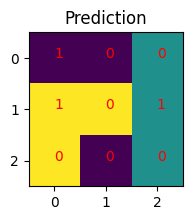

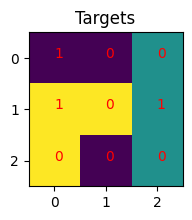

In [61]:
# preds and targets are of shape (batch_size, img_height, img_width, 2)
# the first element in the last dimension is the label category
# the second element in the last dimension is the instance id
# the instance id is ignored in the computation if the label category belongs to STUFF

preds = torch.tensor([[[0, 1], [0, 1], [1, 0]],
                      [[2, 0], [2, 0], [1, 0]],
                      [[2, 0], [0, 1], [1, 0]]])

targets = torch.tensor([[[0, 1], [0, 1], [1, 0]],
                        [[2, 0], [2, 0], [1, 0]],
                        [[2, 0], [0, 1], [1, 0]]])

pq = PanopticQuality(
    things={0, 1},
    stuffs={2}
)
score = pq.update_and_compute(preds, targets)
print("PQ score: ", score.item())
show_masks(preds, targets)

### Instance ID mismatch

If there is a wrong instance ID for a thing, the score is negatively influenced.

PQ score:  0.7999999999999999


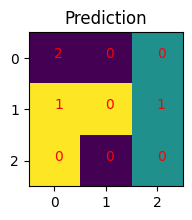

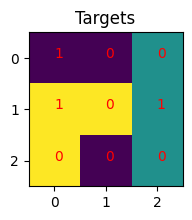

In [62]:
preds = torch.tensor([[[0, 2], [0, 1], [1, 0]], # note that the instance id at [0,0] is wrong
                      [[2, 0], [2, 0], [1, 0]],
                      [[2, 0], [0, 1], [1, 0]]])

targets = torch.tensor([[[0, 1], [0, 1], [1, 0]],
                        [[2, 0], [2, 0], [1, 0]],
                        [[2, 0], [0, 1], [1, 0]]])

pq = PanopticQuality(
    things={0, 1},
    stuffs={2}
)
score = pq.update_and_compute(preds, targets)
print("PQ score: ", score.item())
show_masks(preds, targets)

If there is a wrong instance ID for a stuff, the score doesn't change since stuff labels are merged to one instance per label (e.g. one sky).

PQ score:  1.0


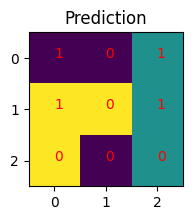

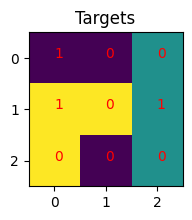

In [63]:
preds = torch.tensor([[[0, 1], [0, 1], [1, 0]], # note that the instance id at [0,0] is wrong
                      [[2, 0], [2, 0], [1, 0]],
                      [[2, 1], [0, 1], [1, 0]]])

targets = torch.tensor([[[0, 1], [0, 1], [1, 0]],
                        [[2, 0], [2, 0], [1, 0]],
                        [[2, 0], [0, 1], [1, 0]]])

pq = PanopticQuality(
    things={0, 1},
    stuffs={2}
)
score = pq.update_and_compute(preds, targets)
print("PQ score: ", score.item())
show_masks(preds, targets)

### Label mismatch

If the label category is wrong (which leads to a wrong instance id), then the score is also negatively impacted.

PQ score:  0.7857142857142857


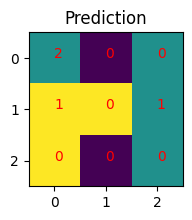

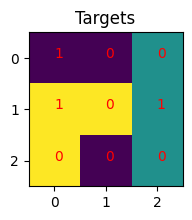

In [64]:
preds = torch.tensor([[[1, 2], [0, 1], [1, 0]], # note that the label at [0,0] is wrong
                      [[2, 0], [2, 0], [1, 0]],
                      [[2, 0], [0, 1], [1, 0]]])

targets = torch.tensor([[[0, 1], [0, 1], [1, 0]],
                        [[2, 0], [2, 0], [1, 0]],
                        [[2, 0], [0, 1], [1, 0]]])

pq = PanopticQuality(
    things={0, 1},
    stuffs={2}
)
score = pq.update_and_compute(preds, targets)
print("PQ score: ", score.item())
show_masks(preds, targets)